# COMPREHENSIVE DATA EXPLORATION WITH PYTHON
[Pedro Marcelino](http://pmarcelino.com) - February 2017

Other Kernels: [Data analysis and feature extraction with Python
](https://www.kaggle.com/pmarcelino/data-analysis-and-feature-extraction-with-python)

----------

#このカーネルでは、次のことを行なっています。

1. <b>問題を理解する</b>。各変数を見て、その問題の意味と重要性についての哲学的分析を行います。
2. <b>単変量解析</b>。従属変数（ 'SalePrice'）に焦点を絞り、それについてもう少し詳しく知ろうとします。
3. <b>多変量解析</b>。従属変数と独立変数がどのように関連しているかを理解しようとします。
4. <b>基本クリーニング</b>。データセットを消去し、欠落しているデータ、異常値およびカテゴリ変数を処理します。
5. <b>想定の前提条件</b>。私たちのデータが大部分の多変量解析技術で必要とされる仮定を満たしているかどうかを確認します。

＊単変量解析は、ひとつの対象にデータが1つしかないデータを扱う統計的方法です。　 <br>
＊独立変数とは、関数y＝f（x）で、変数xのこと。xは独立に値をとり、yはそれに従属して値が定まる。　 <br>
＊従属変数とは、独立変数の変化に応じて変わる数。関数y＝f（x）においては、変数xのとる値によって定まる変数yをさす。<br>＊多変量解析とは、多くの情報の関連性を明確にする統計的方法のこと。


# 必要なライブラリのインポート

In [1]:
#pandasはcvsファイルを読み込んだり、1つでデータを効率的に扱うことが出来る。
import pandas as pd

#matplotlibはグラフなどを描画することが出来る。
import matplotlib.pyplot as plt

#seabornはmatplotlibで描画したグラフをより綺麗に見やすくする。
import seaborn as sns

#numpyは数値計算を効率的に行うための拡張ライブラリ。
import numpy as np

#scupyはnumpyに加え、信号処理や統計などの計算もでき、scipy.stats モジュールは統計分析用のツールや確率過程を確率論的記述が可能。
from scipy.stats import norm

#sklearn.preprocessingは機械学習ライブラリで、分類や回帰、クラスタリングなどの機能が実装されています。
#その中でもpreprocessingはデータの前処理用のライブラリ
from sklearn.preprocessing import StandardScaler
from scipy import stats

#warningsは実行に問題のない警告メッセージを出力することができます。
import warnings

#filterwarningsはその構文の意味付けが将来変更される予定であることを示す警告カテゴリの基底クラスです。
#ignoreは一致した警告を出力しません。
warnings.filterwarnings('ignore')

#jupyternotebookでmatplotlibを表示させる為のコードです。
%matplotlib inline

In [2]:
#pandas.read_csvでcsvファイルを読み込み
df_train = pd.read_csv('input/train.csv')

In [3]:
#DataFrameの特徴（インデックス）を確認
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
pd.options.display.max_columns = None
df_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    11924   Pave   NaN      IR1   
12      13          20       RL          NaN    12968   Pave   NaN      IR2   
13      14          20       RL         91.0    10652   Pave   NaN      IR1   
14      15          20       RL          NaN    10920   Pave   NaN      IR1   
15      16          45       RM         51.0     6120   Pave   NaN      Reg   
16      17          20       RL          NaN    11241   Pave   NaN      IR1   
17      18          90       RL         72.0    10791   Pave   NaN      Reg   
18      19          20       RL         66.0    13695   Pave   NaN      Reg   
19      20          20       RL         70.0     7560   Pave   NaN      Reg   
20      21          60       RL        101.0    14215   Pave   NaN      IR1   
21      22          45       RM         57.0     7449   Pave  Grvl      Reg   
22      23          20       RL         75.0     9742   Pave   NaN      Reg   
23      24         120       RM         44.0     4224   Pave   NaN      Reg   
24      25          20       RL          NaN     8246   Pave   NaN      IR1   
25      26          20       RL        110.0    14230   Pave   NaN      Reg   
26      27          20       RL         60.0     7200   Pave   NaN      Reg   
27      28          20       RL         98.0    11478   Pave   NaN      Reg   
28      29          20       RL         47.0    16321   Pave   NaN      IR1   
29      30          30       RM         60.0     6324   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1430  1431          60       RL         60.0    21930   Pave   NaN      IR3   
1431  1432         120       RL          NaN     4928   Pave   NaN      IR1   
1432  1433          30       RL         60.0    10800   Pave  Grvl      Reg   
1433  1434          60       RL         93.0    10261   Pave   NaN      IR1   
1434  1435          20       RL         80.0    17400   Pave   NaN      Reg   
1435  1436          20       RL         80.0     8400   Pave   NaN      Reg   
1436  1437          20       RL         60.0     9000   Pave   NaN      Reg   
1437  1438          20       RL         96.0    12444   Pave   NaN      Reg   
1438  1439          20       RM         90.0     7407   Pave   NaN      Reg   
1439  1440          60       RL         80.0    11584   Pave   NaN      Reg   
1440  1441          70       RL         79.0    11526   Pave   NaN      IR1   
1441  1442         120       RM          NaN     4426   Pave   NaN      Reg   
1442  1443          60       FV         85.0    11003   Pave   NaN      Reg   
1443  1444          30       RL          NaN     8854   Pave   NaN      Reg   
1444  1445          20       RL         63.0     8500   Pave   NaN      Reg   
1445  1446          85       RL         70.0     8400   Pave   NaN      Reg   
1446  1447          20       RL          NaN    26142   Pave   NaN      IR1   
1447  1448          60       RL         80.0    10000   Pave   NaN      Reg   
1448  1449          50       RL         70.0    11767   Pa

# 1. どうしたらいいの？


私たちのデータを理解するために、各変数を見て、その意味を理解し、この問題との関連性を調べることができます。これは時間がかかることはわかっていますが、データセットの風味がわかります。

私たちの分析にいくつかの規律を持たせるために、次の列を持つExcelスプレッドシートを作成することができます：

・変数 - 変数名

・タイプ - 変数のタイプの識別。このフィールドには、2つの値、 '数値'または 'カテゴリ'があります。「数値」とは、値が数値である変数を意味し、「カテゴリ」とは、値がカテゴリである変数を意味する。

・セグメント - 変数のセグメントの識別。segments: 「building」, 「space」 、 「location」　3つの可能なセグメントを定義することができます。

・期待 - 「SalePrice」における変動の影響に関する我々の期待。可能な値として、「高」、「中」、「低」のカテゴリスケールを使用できます。

・結論 - 変数の重要性に関する私たちの結論は、データを素早く見てからです。私たちは、「期待」と同じ
カテゴリーを維持することができます。

・コメント - 私たちに発生した一般的なコメント。

スプレッドシートをフィルタリングして、「期待」の変数を注意深く見ていきます。
次に、これらの変数と「SalePrice」の間の散布図をいくつか散策して、「結論」欄に記入してください。これはちょうど私たちの期待を修正するものです。

私はこのプロセスを経て、次の変数がこの問題で重要な役割を果たすことができると結論づけました。
* OverallQual .
* YearBuilt.
* TotalBsmtSF.
* GrLivArea.


# 最初に「SalePrice」を分析する。

In [5]:
#describe関数はDataFrameの要約統計量を取得できる。
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

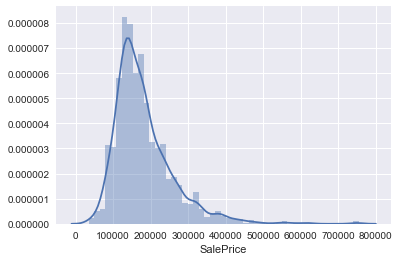

In [6]:
#sale.pliceのヒストグラムを表示
#青い線はカーネル密度分布の曲線（全体の分布を推定）
sns.distplot(df_train['SalePrice']);

In [7]:
#このヒストグラムの尖度（どのくらいピークが尖っているか）と歪度（左右にどのくらい偏っているか） を表示
#skew (歪度)　kurt　(尖度)
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


# SalePriceとの関係

### 数値変数との関係

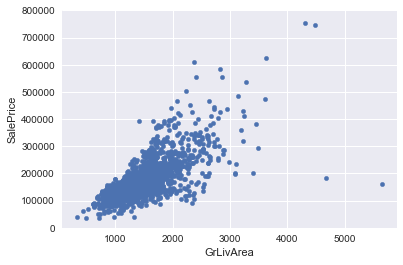

In [8]:
#grlivareaとsalepriceの散布図
var = 'GrLivArea'

#pd.concatでデータを結合(df_trainのカムルsalepriceとGrLiVArea)
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)

#散布図を描画するメソッド
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000),)

#2変数間の関係が強いと言えます。

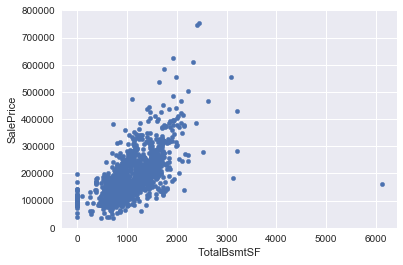

In [9]:
##gtotalbsmtsfとsalepriceの散布図
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))
#2変数間の関係が強いと言えます。

### カテゴリの特徴との関係

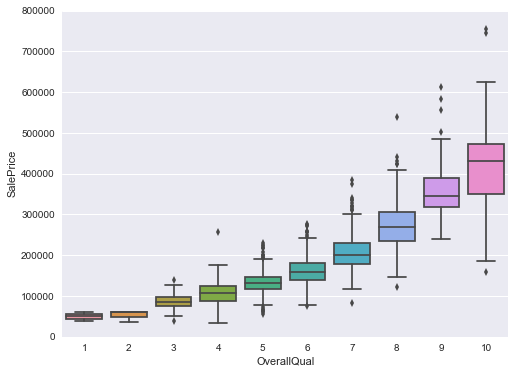

In [10]:
#箱ひげ図 overallqual/saleprice　（データのばらつきをわかりやすく表現するための統計図）
#下の線と上の線が最大値と最小値真ん中のボックスに７５パーセント集まってる。
#plt.subplotはグリッド上に規則正しくグラフを配置する
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

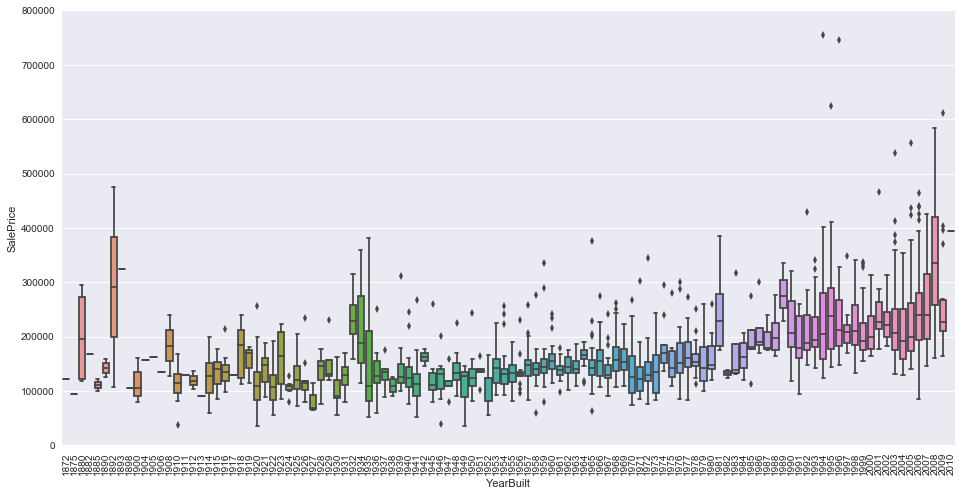

In [11]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

上記のデータを見て次のように結論づけることができます：

* 'GrLivArea'と 'TotalBsmtSF'は 'SalePrice'と線形関係にあるようです。両方の関係は正の値をとります。つまり、一方の変数が増加すると他方の変数も増加します。 'TotalBsmtSF'の場合、線形関係の傾きが特に高いことがわかります。
* 'OverallQual'と 'YearBuilt'も 'SalePrice'と関連しているようです。 'OverallQual'のケースでは、販売価格が全体の品質とともにどのように上昇するかをボックスプロットで示しています。

私たちは4つの変数を分析しましたが、分析する必要がある変数は他にもたくさんあります。ここでのトリックは、正しいフィーチャ（フィーチャ選択）の選択であり、フィーチャの複雑な関係の定義（フィーチャ・エンジニアリング）ではないようです。

今まで私たちは直感に従い、重要であると考えた変数を分析しました。私たちの分析に客観的な性格を与える努力にもかかわらず、我々の出発点は主観的であったと言わざるを得ない。

エンジニアとして、私はこのアプローチに慣れていません。私の教育は、客観的に見る訓練された心を開発することでした。それには理由があります。構造工学で主観的にすると、物事が崩れていくのが見えます。それではいけません。

だから、慣性を克服し、もっと客観的な分析をしましょう。

私たちはどの、特徴を選べば良いかを見て理解していく必要があります。

*相関行列（ヒートマップ形式）。
* 'SalePrice'相関行列（ズームヒートマップスタイル）。
*最も相関の高い変数間の散布図（ジャガースタイルのように動く）。

#### 相関行列（ヒートマップ形式）

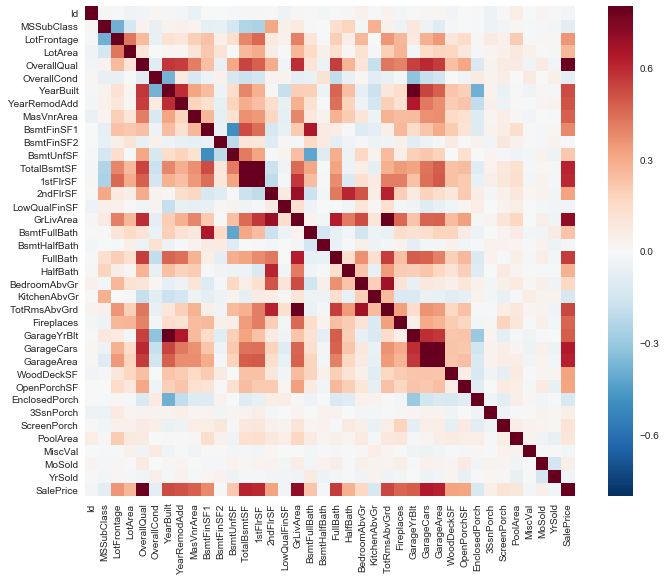

In [12]:
#相関行列
#pandas.DataFrame.corr()は各列の間の相関係数が算出される。
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

ヒートマップのオプションについてはこちらを参照
https://pythondatascience.plavox.info/seaborn/heatmap

私の注意を引く2つの赤い色の四角があります。<br>
最初の変数は 'TotalBsmtSF'と '1stFlrSF'変数を参照し、2番目の変数は 'Garage * X *'変数を参照します。いずれの場合も、これらの変数間の相関がどの程度重要であるかを示しています。<BR>
実際、この相関は非常に強く、多重共線性の状況を示すことができます。これらの変数について考えると、それらがほぼ同じ情報を与え、多重線形性が実際に発生すると結論付けることができます。<BR>
ヒートマップはこのような状況を検出するのに最適で、私たちのような機能選択が支配的な問題では、それらは不可欠なツールです。<br>
私の注目を集めた別のものは、「SalePrice」の相関関係でした。よく知られている「GrLivArea」、「TotalBsmtSF」、「OverallQual」が大きな「Hi！」と言っているのを見ることができますが、考慮すべき他の多くの変数も見ることができます。それが私たちが次にやることです


#### SalePriceの相関行列（ズームヒートマップスタイル）

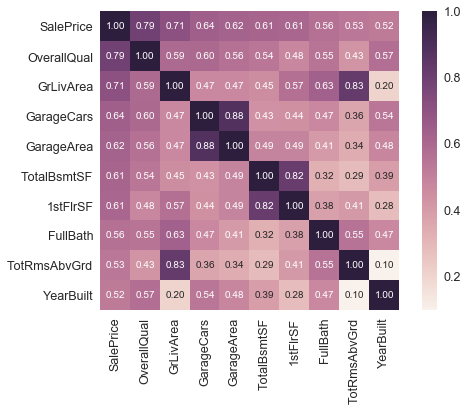

In [13]:
#saleprice相関行列
k = 10 #ヒートマップの変数の数

#値の大きいものを DataFrame.nlargest() メソッドで取り出す。
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index

#np.corrcoed()相関関係代数を計算
cm = np.corrcoef(df_train[cols].values.T)

#Seabornのデフォルトスタイルが適用される
sns.set(font_scale=1.25)

hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

これらは「SalePrice」と最も関連性のある変数です。<br>
これについての私の考え：

* 'OverallQual'、 'GrLivArea'、 'TotalBsmtSF'は 'SalePrice'と強く相関しています。
* 'GarageCars'と 'GarageArea'は、最も強く相関する変数の一部です。しかし、最後のサブポイントで議論したように、ガレージに収まる車の数はガレージの面積の結果です。 「GarageCars」と「GarageArea」は、双子の兄弟のようなものです。あなたはそれらを区別することはできません。したがって、分析にはこれらの変数のうちの1つだけが必要です（GarageCarsは 'SalePrice'との相関が高いので保つことができます）。
* 'TotalBsmtSF'と '1stFloor'も双子の兄弟のようです。 「TotalBsmtSF」は、私たちの最初の推測が正しかったと言うことができます
* 「YearBuilt」は「SalePrice」と少し相関があるようです。正直なところ、私は「YearBuilt」について考えることを恐れています。なぜなら、私は、この権利を得るために時系列分析を少し行うべきだと感じ始めているからです。私はこれを宿題のままにしておきます。

散布図に進んでみましょう。

#### 'SalePrice'と相関変数間の散布図

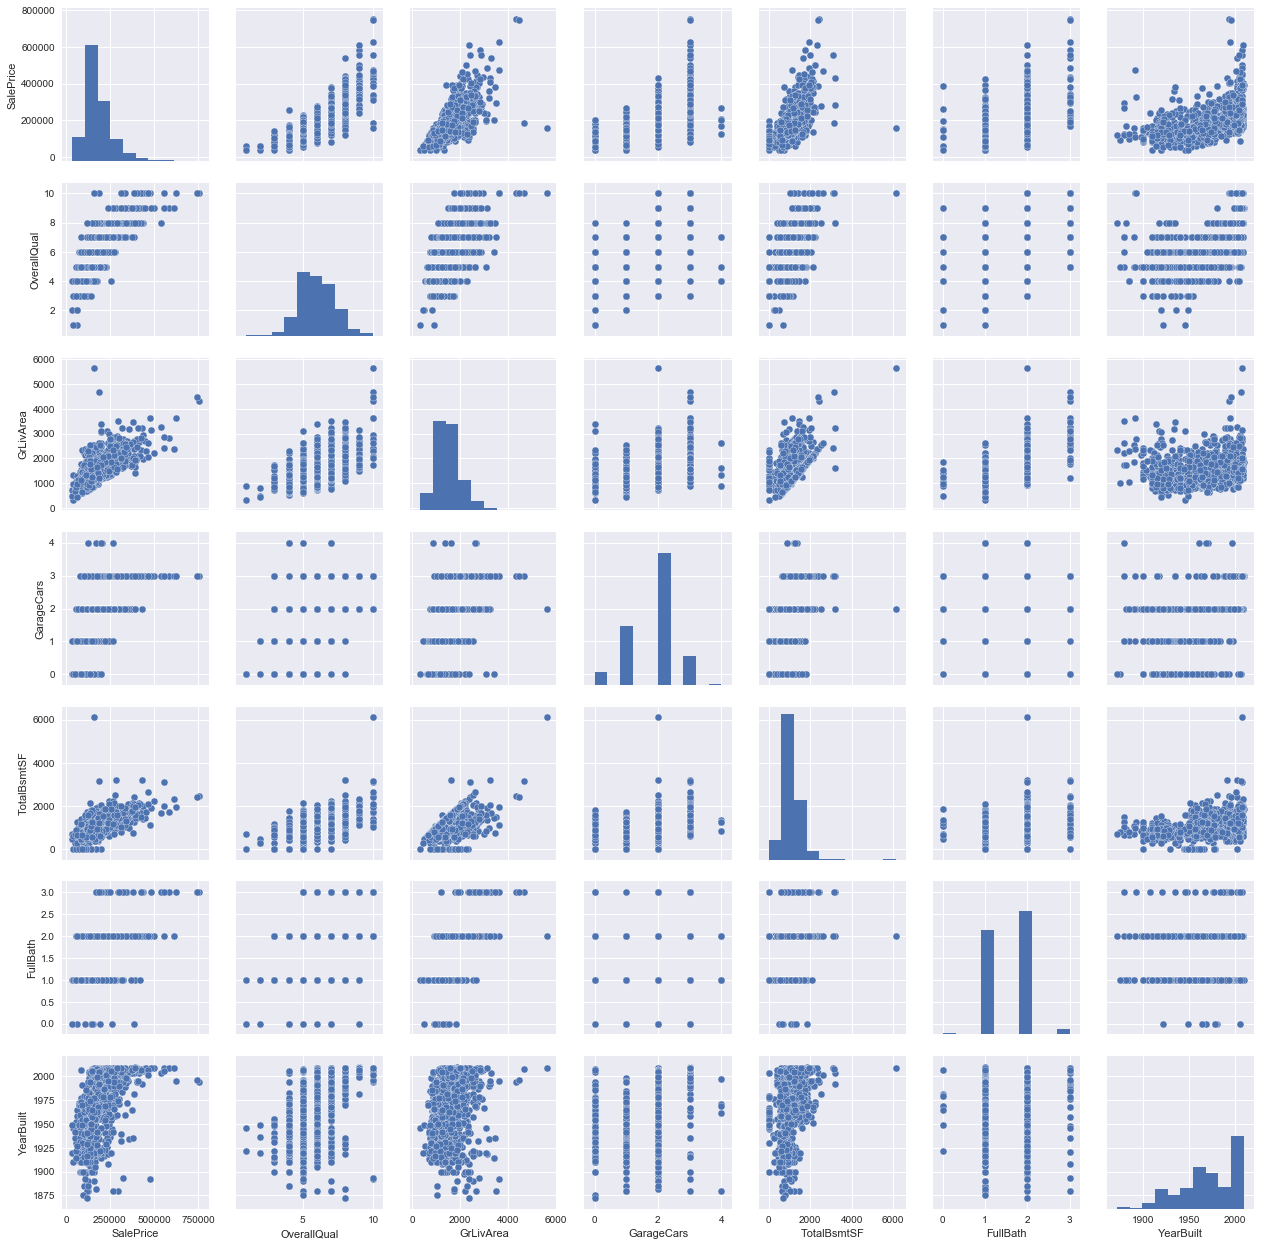

In [14]:
#散布図
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

このメガ・スキャター・プロットは、変数の関係について合理的な考えを与えてくれます。

面白いと思われる数字の1つは、「TotalBsmtSF」と「GrLiveArea」の間のものです。この図では、点が線のように線を引いていることがわかります。直線はほぼ境界線のように機能します。ドットの大部分がそのラインの下にとどまることは、完全に意味をなさない。地下のエリアは上記の居住エリアと同じですが、バンカーを購入しようとしている場合を除き、地上の居住エリアよりも大きな地下エリアは期待できません。

「SalePrice」と「YearBuilt」に関するプロットもまた私たちに考えることができます。 「ドットクラウド」の一番下には、恥ずかしがり屋の指数関数（創造的なもの）のように見えるものがあります。また、「ドットクラウド」の上限でこの同じ傾向を見ることができます（さらに創造的である）。また、最後の年に関するドットのセットがこの制限を超えている傾向にあることに気づく（私は価格が今より速くなっていると言いたい）。

欠落しているものに進む：データの欠落！

# 4. データの欠落

欠落しているデータを考える際の重要な質問：

*　欠けているデータはどれくらいの頻度であるのですか？
*　データが不足しているか、パターンがありますか？

欠落しているデータはサンプルサイズの縮小を意味する可能性があるため、これらの質問に対する答えは実際的な理由から重要です。これにより、分析を進めることができなくなる可能性があります。さらに、実質的な観点からは、欠落しているデータプロセスに偏りがなく、不都合な真実が隠されていることを保証する必要があります。

In [15]:
#mデータの欠落

#totalにtrain内の変数にどれだけ欠損（NaN)の合計があるか計算しソート
total = df_train.isnull().sum().sort_values(ascending=False)

#欠損が何パーセントに当たるか計算
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)

#欠損データのデータフレーム作成
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageCond       81  0.055479
GarageType       81  0.055479
GarageYrBlt      81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtExposure     38  0.026027
BsmtFinType2     38  0.026027
BsmtFinType1     37  0.025342
BsmtCond         37  0.025342
BsmtQual         37  0.025342
MasVnrArea        8  0.005479
MasVnrType        8  0.005479
Electrical        1  0.000685
Utilities         0  0.000000

欠落したデータをどのように処理するかを理解するためにこれを分析してみましょう。

データの15％以上が欠落している場合は、対応する変数を削除し、それが存在しなかったふりをしてください。　　
これは、これらの場合に欠落したデータを埋めるためのトリックを試行しないことを意味します。これに応じて、削除する必要がある一連の変数（「PoolQC」、「MiscFeature」、「Alley」など）があります。

残りのケースに関係するものでは、「Garage * X *」変数のデータの欠落数が同じであることがわかります。私は不足しているデータは同じ観測値を参照していると考えています（私はチェックしませんが、5％で5ドル問題で20ドルを使うべきではありません）。ガレージに関する最も重要な情報は「GarageCars」で表現されており、欠落しているデータの5％を話していることを考慮して、前述の「Garage * X *」変数を削除します。同じロジックが 'Bsmt * X *'変数に適用されます。

'MasVnrArea'と 'MasVnrType'に関して、これらの変数は必須ではないと考えることができる。さらに、彼らはすでに考慮されている 'YearBuilt'と 'OverallQual'と強い相関関係があります。したがって、 'MasVnrArea'と 'MasVnrType'を削除すると、情報は失われません。

最後に、「Electrical」には1つの見逃しがあります。これは単なる観測であるため、この観測値を削除して変数を保持します。

要約すると、不足しているデータを処理するために、変数 'Electrical'を除いて、欠落したデータを含むすべての変数を削除します。 「Electrical」では、欠落しているデータの観測を削除します。

In [16]:
#欠損データの処理

#　trainの2以上ある欠損データを削除
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)

#Electricalの欠損データを削除
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)

#欠損データが全て消えているか確認。
df_train.isnull().sum().max() 

df_train.head()

Id  MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0   1          60       RL     8450   Pave      Reg         Lvl    AllPub   
1   2          20       RL     9600   Pave      Reg         Lvl    AllPub   
2   3          60       RL    11250   Pave      IR1         Lvl    AllPub   
3   4          70       RL     9550   Pave      IR1         Lvl    AllPub   
4   5          60       RL    14260   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            7            5       2003          2003     Gable  CompShg   
1            6            8       1976          1976     Gable  CompShg   
2            7            5       2001          2002     Gable  CompShg   
3            7            5       1915          1970     Gable  CompShg   
4            8            5       2000          2000     Gable  CompShg   

  Exterior1st Exterior2nd ExterQual ExterCond Foundation  BsmtFinSF1  \
0     VinylSd     VinylSd        Gd        TA      PConc         706   
1     MetalSd     MetalSd        TA        TA     CBlock         978   
2     VinylSd     VinylSd        Gd        TA      PConc         486   
3     Wd Sdng     Wd Shng        TA        TA     BrkTil         216   
4     VinylSd     VinylSd        Gd        TA      PConc         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
0           0        150          856    GasA        Ex          Y      SBrkr   
1           0        284         1262    GasA        Ex          Y      SBrkr   
2           0        434          920    GasA        Ex          Y      SBrkr   
3           0        540          756    GasA        Gd          Y      SBrkr   
4           0        490         1145    GasA        Ex          Y      SBrkr   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd  \
0         2         1             3             1          Gd             8   
1         2         0             3             1          TA             6   
2         2         1             3             1          Gd             6   
3         1         0             3             1          Gd             7   
4         2         1             4             1          Gd             9   

  Functional  Fireplaces  GarageCars  GarageArea PavedDrive  WoodDeckSF  \
0        Typ           0           2         548          Y           0   
1        Typ           1           2         460          Y         298   
2        Typ           1           2         608          Y           0   
3        Typ           1           3         642          Y           0   
4        Typ           1           3         836          Y         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0  

異常値はまた、我々が知っておくべきであるものです。

異常値は複雑な主題であり、それはより注意を払う必要がある。ここでは、「SalePrice」の標準偏差と散布図を簡単に分析します。

### 単変量解析

ここでの主な関心事は、外れ値としての観測値を定義するしきい値を設定することです。そのために、データを標準化します。この文脈において、データ標準化とは、データ値を平均値0および標準偏差1に変換することを意味する。

In [17]:
#データの標準化
#標準化とは平均値を０にして他の特徴（変数）を置き換える

#StandardScaler()は標準化をするライブラリで、fit_transformはパラメータ計算とデータ変換をまとめて実行します。
#np.newaxisは要素数1の新たな軸(axis)を追加する
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);

#低い数値と高い数値を１０づつソート
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('分布の外側範囲(low):')
print(low_range)
print('\n 分布の外側範囲 (high）:')
print(high_range)

分布の外側範囲(low):
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

 分布の外側範囲 (high）:
[[ 3.82758058]
 [ 4.0395221 ]
 [ 4.49473628]
 [ 4.70872962]
 [ 4.728631  ]
 [ 5.06034585]
 [ 5.42191907]
 [ 5.58987866]
 [ 7.10041987]
 [ 7.22629831]]


*低範囲の値は似ていて、0からあまり離れていません。
*高範囲の値は0からずっと離れていて、7の値は実際には範囲外です。

ここでは、これらの値のいずれも外れ値としては考慮しませんが、これらの2つの値に注意する必要があります。

### 二変量解析

私たちはすでに、次の散布図を見ました。しかし、私たちが新しい視点から物事を見ると、常に発見すべきことがあります。

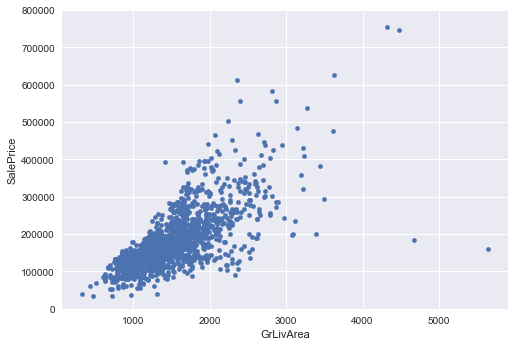

In [18]:
#二変量解析 saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

What has been revealed:

*　大きな「GrLivArea」を持つ2つの値は奇妙に見え、群衆に追いつかない。なぜこれが起こっているのか推測することができます。多分彼らは農業地域を指し、それは低価格を説明することができます。私はこれについてはわからないが、私はこれらの2つの点が典型的な事例を代表するものではないと確信している。したがって、それらを異常値として定義して削除します。　　
*　プロットの上の2つの観察は、我々が注意すべきであると言った何らかの観察である。彼らは2つの特別なケースのように見えますが、それは傾向に従っているようです。そのため、私たちはそれらを保管します。

In [19]:
#異常なポイントを削除する

#デフォルトは昇順。降順にしたい場合は引数ascending
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]

df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

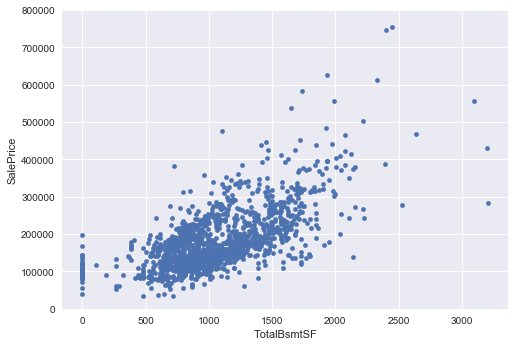

In [20]:
#二変量解析 saleprice/TotalBsmtSF
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

いくつかの観測値（たとえばTotalBsmtSF> 3000）を排除したいと思うかもしれませんが、その価値はないと思います

# ハードコアを得る


Ayn Randの小説「Atlas Shrugged」では、John Galtは誰ですか？この本の大きな部分は、この質問に対する答えを見つけるための探求についてです。

私は今、ランディアンを感じる。 「SalePrice」は誰ですか？

この質問に対する答えは、多変量解析のための統計的根拠の基礎となる仮定をテストすることにある。私たちはすでにデータクリーニングを行い、「SalePrice」について多くのことを発見しました。今度は、「SalePrice」が多変量解析技術を適用するための統計的前提条件をどのように遵守しているかを深く理解しましょう。

4つの前提条件がテストされる必要があります。

* <b>正常性</ b>  - 正常性について言えば、データは正規分布のように見えるということです。これはいくつかの統計テストがこれに依存しているため重要です（e.g. t-statistics）。この練習では、「SalePrice」の単変量正規性をチェックします（これは限定的なアプローチです）。単変量正規性は多変量正規性（私たちが望むもの）を保証するものではありませんが、それが役に立ちます。考慮すべきもう一つの詳細は、大きなサンプル（> 200回の観測）では、正常性はそのような問題ではないということです。しかし、正規性を解くと、他の多くの問題（例えば、異質性）を避けることができ、それがこの分析を行う主な理由です。

* <b>均質性</ b>  - 私はそれが正しいと思っています。均質忠実度とは、従属変数が予測変数の範囲全体で均等な分散レベルを示すという仮定をいう。独立変数のすべての値にわたって誤差項を同じにしたいので、均質忠実度が望ましい。

* <b>直線性</ b>  - 直線性を評価する最も一般的な方法は、散布図を調べて線形パターンを検索することです。パターンが線形でない場合、データ変換を探索する価値があります。しかし、私たちが見た散布図のほとんどは線形関係を持っているように見えるので、これには取り込まれません。

* <b>相関エラーの不在</ b>  - 定義されているような相関エラーは、あるエラーが別のエラーと関連している場合に発生します。例えば、ある正のエラーが体系的に負のエラーを起こすと、これらの変数間に関係があることを意味します。これは、いくつかのパターンが時間に関連する時系列で頻繁に発生します。私たちはこれにも関わらないでしょう。ただし、何かを検出した場合は、その効果を説明できる変数を追加してみてください。これは相関エラーの最も一般的な解決策です。




### ポイントを削除する

ここでのポイントは、無駄のない方法で 'SalePrice'をテストすることです。私たちはこれに注意を払って行います：

* <b>ヒストグラム</ b>  - 尖度と歪度。
* <b>正規確率プロット</ b>  - データ分布は、正規分布を表す対角線に厳密に従う必要があります。

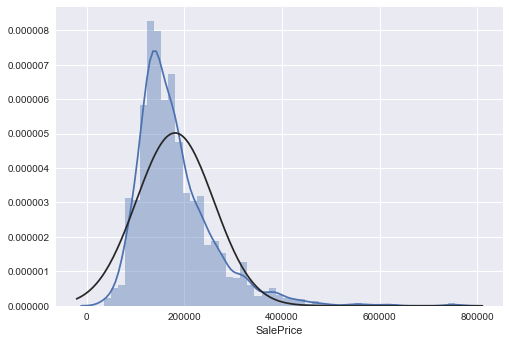

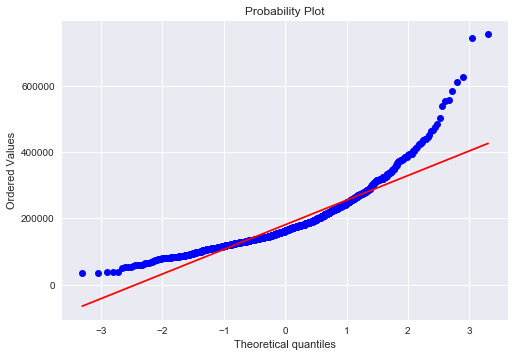

In [21]:
#ヒストグラムと正規確率プロット
#正規確率プロットとはプロットが直線状に分布していればデータが正規分布していることを表します。

#黒い線はノルム,最尤推定値（大きさ、力の強さを表している。）
#*最尤法とは統計学において、与えられたデータからそれが従う確率分布の母数を点推定する方法である。
#青い線はカーネル密度分布の曲線（全体の分布を推定）
sns.distplot(df_train['SalePrice'], fit=norm);

#plt.figure() メソッドは何も描画されていない新しいウィンドウを描画します。
fig = plt.figure()

#正規確率プロットの出力
res = stats.probplot(df_train['SalePrice'], plot=plt)

「SalePrice」は正常ではありません。 「ピーク」、正の歪度を示し、対角線に沿っていません。(青い線と黒い線の天辺）

しかし、すべてが失われません。簡単なデータ変換で問題を解決できます。これは統計的な本で学ぶことができるすばらしいものの1つです。正の歪度の場合、通常はログ変換がうまくいきます。

In [22]:
#ログ変換を適用する
df_train['SalePrice'] = np.log(df_train['SalePrice'])

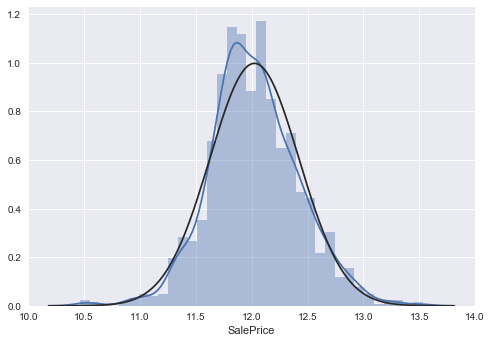

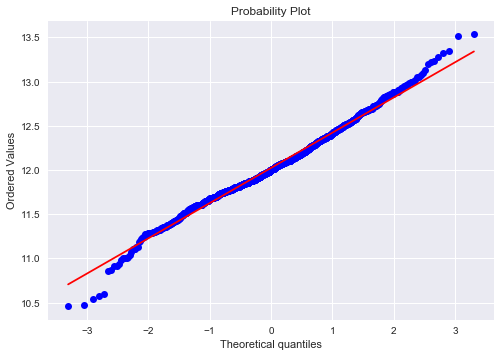

In [23]:
#変換ヒストグラムと正規確率プロット
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

出来ました！次は'GrLivArea'で何が起こっているのか調べてみましょう。

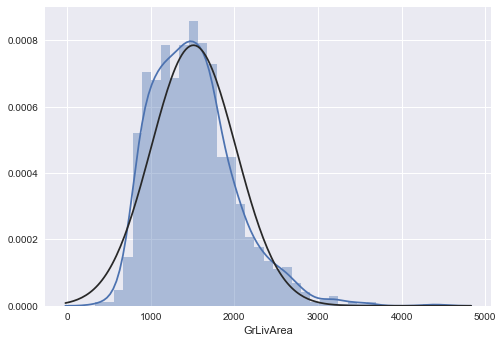

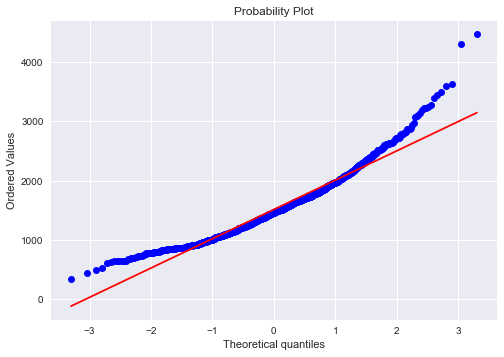

In [24]:
#ヒストグラムと正規確率プロット
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [25]:
#log変換
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

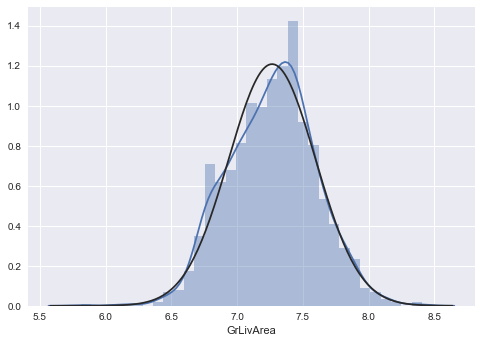

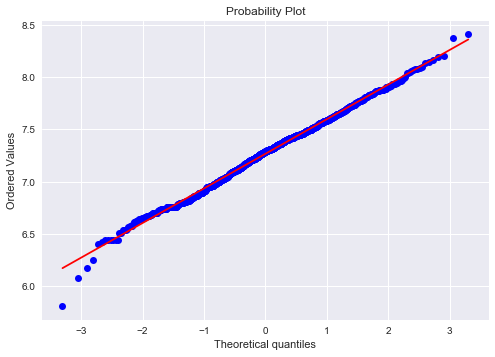

In [26]:
#ヒストグラムと正規確率プロット
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

次はTotalBsmtSF

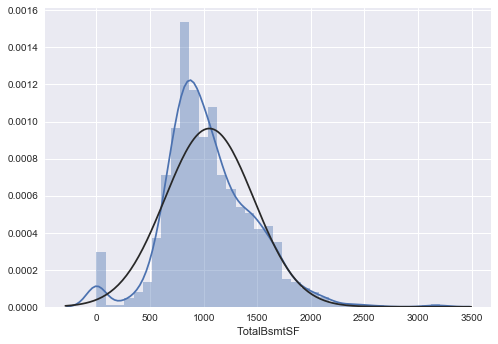

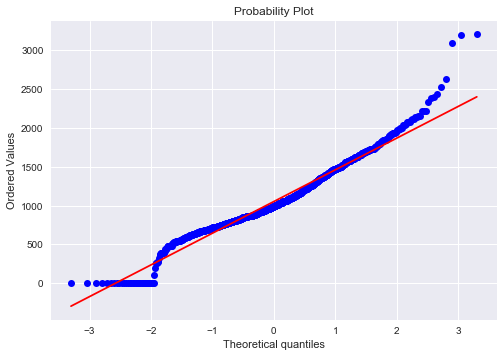

In [27]:
#ヒストグラムと正規確率プロット
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

さて、私たちは大きなボスを扱っています。ここには何がありますか？

*　線は、一般に、歪度を提示するものです。
*　価値ゼロの観測（地下のない住宅）がかなり多い
*　大きな問題は、ゼロという値ではログの変換を実行できないためです。

ここでログ変換を適用するには、基底（バイナリ変数）を持つか持っていないかの効果を得るための変数を作成します。次に、ゼロ以外のすべての観測値に対してログ変換を行い、値ゼロの観測値は無視します。このようにして、私たちは地下を持つかどうかの影響を失うことなく、データを変換することができます。

このアプローチが正しいかどうかはわかりません。それはちょうど私にとって正しいと思われました。それが私が「高リスク工学」と呼ぶものです。

In [28]:
#新しい変数のための特徴を作成します（1つはバイナリカテゴリの機能なので十分です）

#if area>0 it gets 1, for area==0 it gets 0

#新しくHasBsmtという特徴を作る
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)

#'HasBsmt'の値を０にする。
df_train['HasBsmt'] = 0 

#df.locで値の変更（もしTotalBsmtSFが１異常なら１を代入、０ならそのまま０が代入されている）
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1


In [29]:
#データの変換

#もしHasBsmtが１であればTotalBsmtSFをlog変換
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

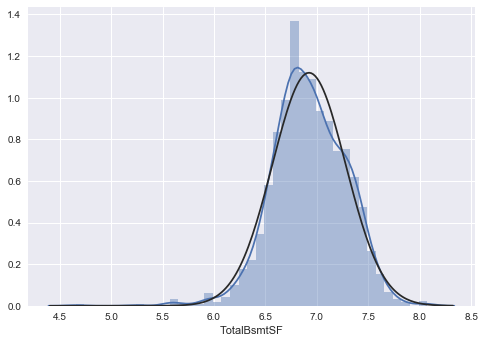

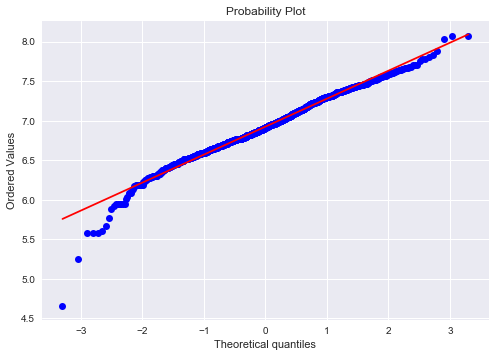

In [30]:
#ヒストグラムと正規確率プロット
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

### 最初の試行で「等分散性」を書くための検索

2つのメトリック変数の等分散性をテストする最良の方法は、グラフィカルに表示されます。均等分散からの逸脱は、円錐（グラフの一方の側に小さな分散、反対側に大きな分散）またはダイヤモンド（分布の中心に多数の点）のような形状によって示される。


* メトリック変数とは（計量的、順位付け）
* 等分散性(homoscedasticity)とは、誤差（残差）の分散が一定であることを言う

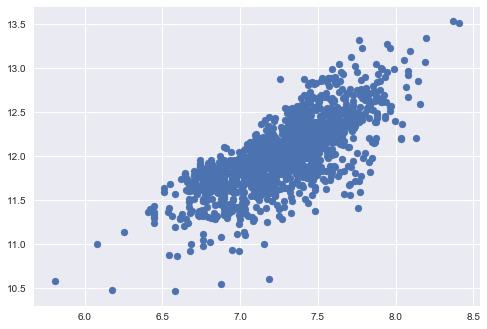

In [31]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

この散布図の以前のバージョン（ログ変換の前）は円錐形をしていました（ 'SalePriceと相関変数の間の散布図を確認してください（ジャガースタイルのように動く）'）。ご覧のように、現在の散布図はもはや円錐形をしていません。それが正常の力です！いくつかの変数の正規性を保証するだけで、我々は均等分散問題を解決しました。

では、 'SalePrice'と 'TotalBsmtSF'を確認しましょう。

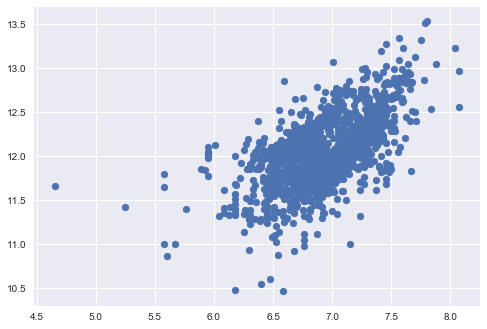

In [32]:
#scatter plot
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

一般的に、「SalePrice」は、「TotalBsmtSF」の範囲で均等な分散レベルを示すと言えます

# 最後に、ダミー変数

In [33]:
#カテゴリ変数をダミーに変換する

#ダミー変数とは文字列でカテゴリー分けされた性別などのデータを、男を0, 女を1のように変換したり、
#多クラスの特徴量をone-hot表現に変換したりすることができる。
#機械学習の前処理として行うことが多い。

df_train = pd.get_dummies(df_train)

# 結論

それでおしまい！私たちは私たちの運動の終わりに達しました。

このカーネルで、我々は、「SalePrice」のみを分析し、最も相関のある変数を用いて欠損データと外れ値を処理し、いくつかの基本的な統計的仮説を検証し、カテゴリー変数をダミー変数に変換した。これは、Pythonが私たちをより簡単にするのに役立つ多くの作業です。
